In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch dataset 
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296) 
  
# Data (as pandas dataframes) 
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features 
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets 

X = pd.concat([X, y], axis=1)
  
# Metadata 
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata) 
  
# Variable Information 
print(diabetes_130_us_hospitals_for_years_1999_2008.variables)

{'uci_id': 296, 'name': 'Diabetes 130-US Hospitals for Years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

C:\Users\Manan\AppData\Roaming\Python\Python310\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [ ]:
# Perform EDA on the Data
from ydata_profiling import ProfileReport
profile = ProfileReport(X, title="Pandas Profiling Report")
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [2]:
X.shape

(101766, 48)

<h3 align='center'>EDA</h3>

In [3]:
# Missing Values Analysis
missing_values = X.isnull().sum()
print(missing_values[missing_values > 0])

race                  2273
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
max_glu_serum        96420
A1Cresult            84748
dtype: int64


In [2]:
X['age'] = X['age'].str.replace('[', '')
X['age'] = X['age'].str.replace(')', '')
X['age'] = X['age'].str.split('-', expand=True)[0]
X['age'] = X['age'].astype(int)
X = X[X['gender'].isin(['Female', 'Male'])]

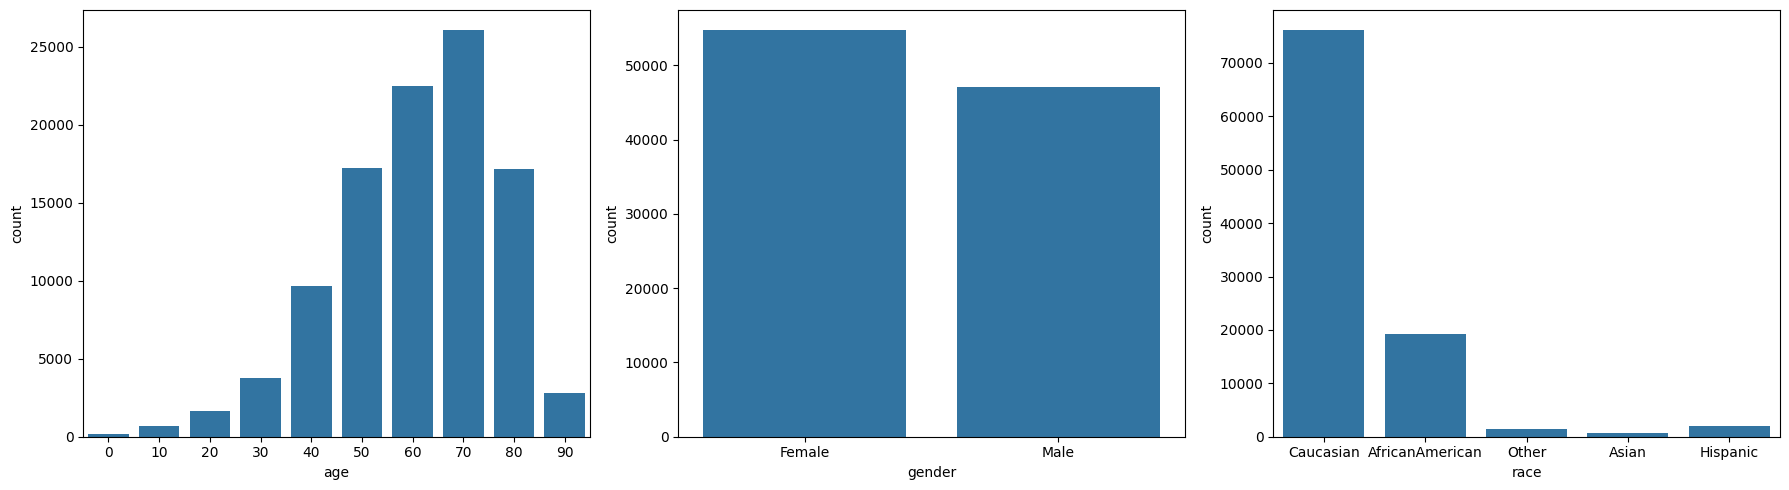

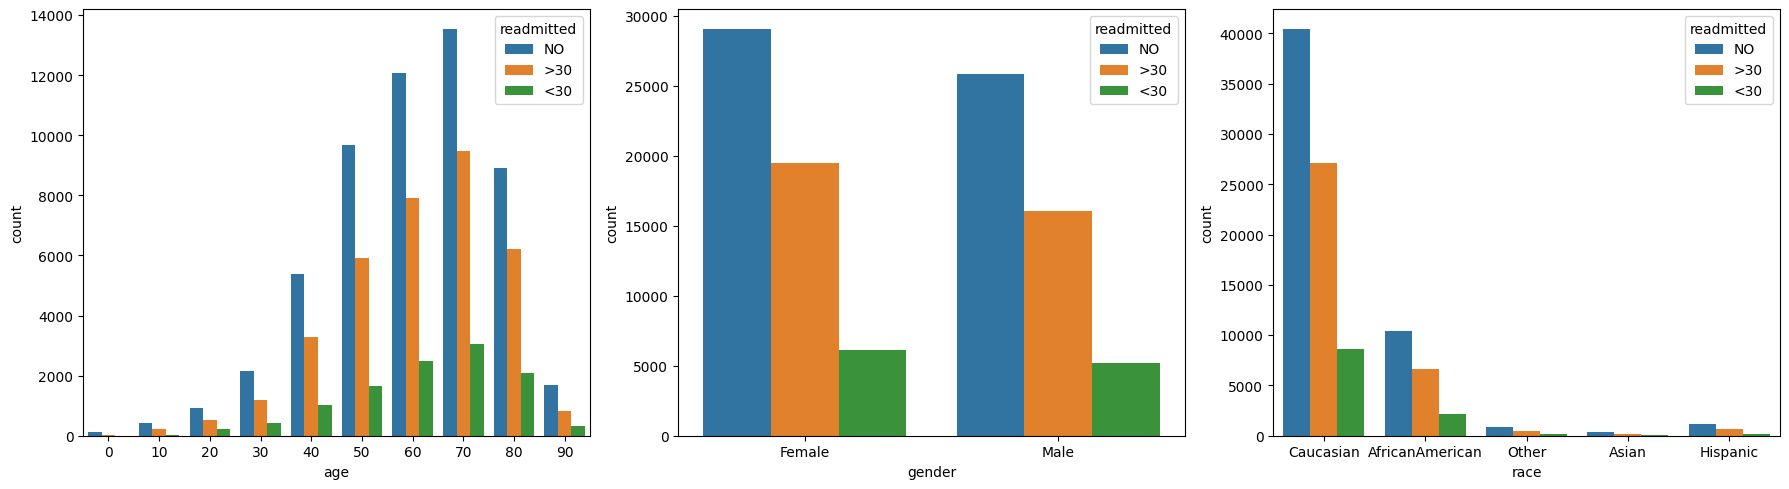

In [3]:
# Demographics Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Demographics
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  
sns.countplot(data=X, x='age', ax=axs[0])
sns.countplot(data=X, x='gender', ax=axs[1])
sns.countplot(data=X, x='race', ax=axs[2])
plt.tight_layout()
plt.show()

# Demographics vs. Readmission Rate
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  
sns.countplot(data=X, x='age', hue='readmitted', ax=axs[0])
sns.countplot(data=X, x='gender', hue='readmitted', ax=axs[1])
sns.countplot(data=X, x='race', hue='readmitted', ax=axs[2])
plt.tight_layout()
plt.show()


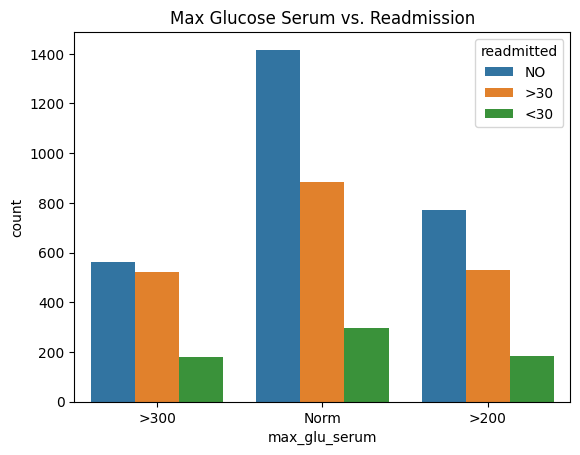

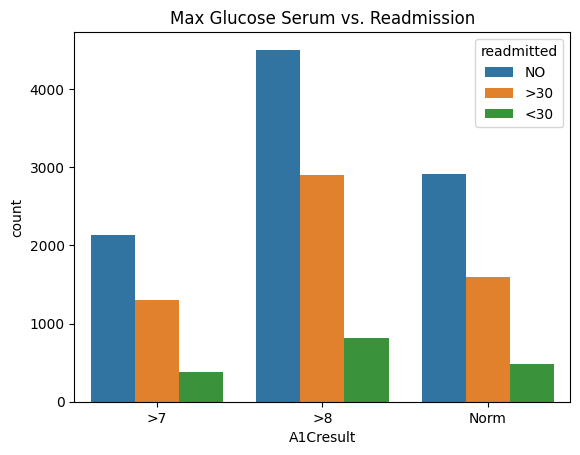

In [4]:
# Lab Results vs. Readmission
sns.countplot(data=X, x='max_glu_serum', hue='readmitted')
plt.title('Max Glucose Serum vs. Readmission')
plt.show()

sns.countplot(data=X, x='A1Cresult', hue='readmitted')
plt.title('Max Glucose Serum vs. Readmission')
plt.show()


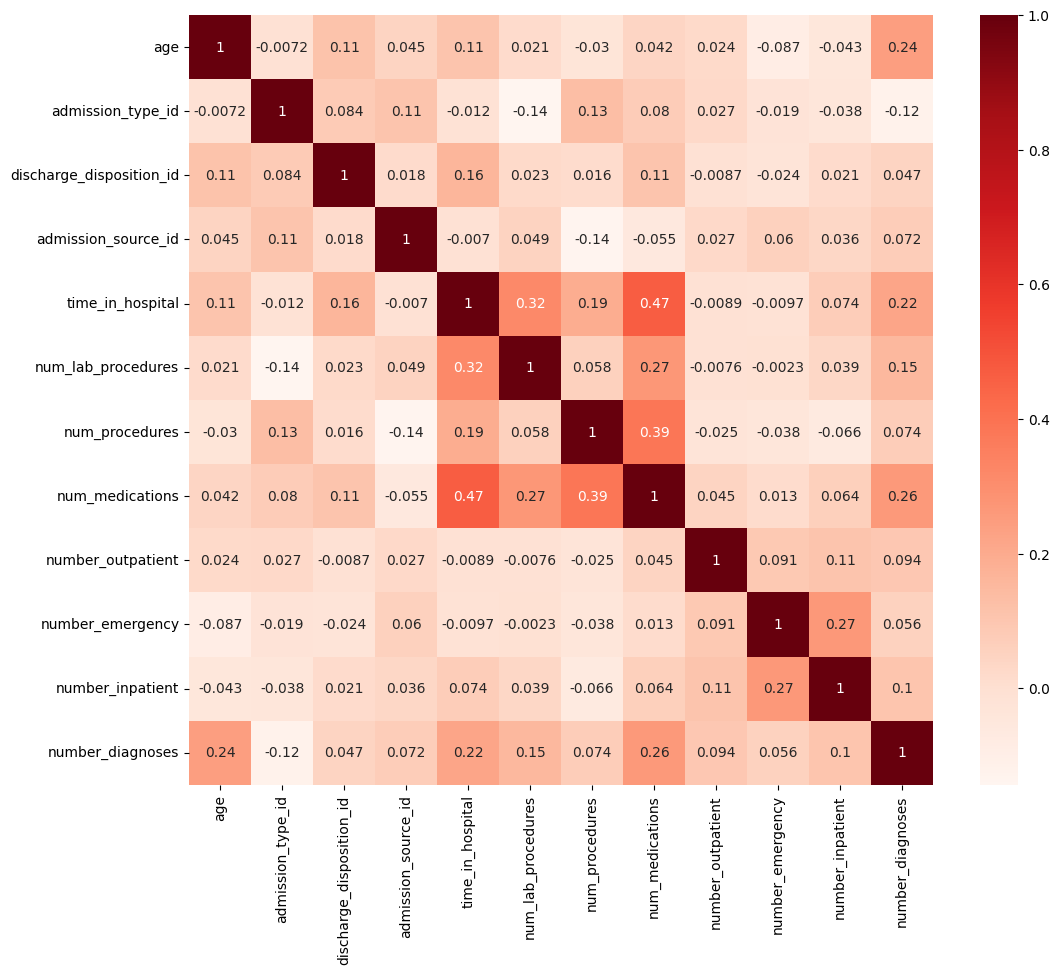

In [5]:
# Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,10))

# Plot correlatoin matrix of numerical values
cor = X.select_dtypes(include=[np.number]).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

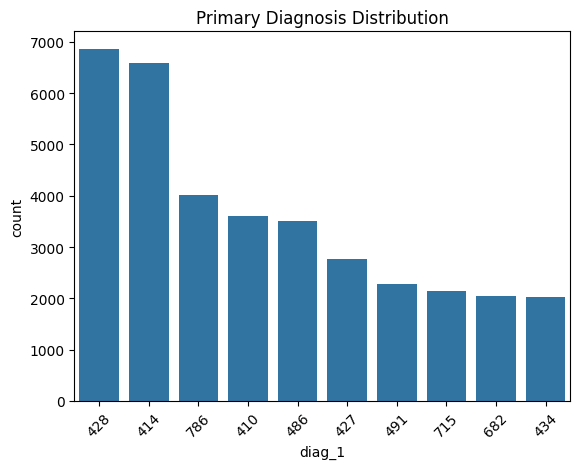

In [6]:
# Primary Diagnosis Distribution - Top 10 most frequent diagnoses
sns.countplot(data=X, x='diag_1', order=X['diag_1'].value_counts().index[:10])  
plt.title('Primary Diagnosis Distribution')
plt.xticks(rotation=45)
plt.show()


In [7]:
print(len(y))
y.value_counts()

101766


readmitted
NO            54864
>30           35545
<30           11357
Name: count, dtype: int64

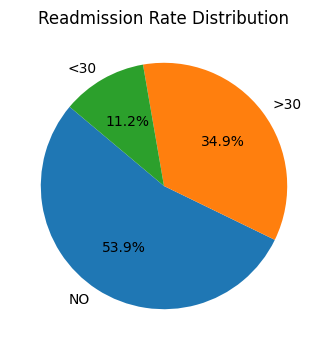

In [8]:
# Readmission Rate Distribution 

readmission_counts = X['readmitted'].value_counts()  

plt.figure(figsize=(4, 4))  
plt.pie(
    readmission_counts,
    labels=readmission_counts.index,
    autopct='%1.1f%%', 
    startangle=140  
)
plt.title('Readmission Rate Distribution')
plt.show()


<h3 align='center'>Preprocessing</h3>

In [9]:
for med_col in X.columns[22:-2]:
    X.loc[:, med_col] = X[med_col].replace('Up', 3)
    X.loc[:, med_col] = X[med_col].replace('Steady', 2)
    X.loc[:, med_col] = X[med_col].replace('Down', 1)
    X.loc[:, med_col] = X[med_col].replace('No', 0)

X.loc[:, "max_glu_serum"] = X["max_glu_serum"].replace('>300', 3)
X.loc[:, "max_glu_serum"] = X["max_glu_serum"].replace('>200', 2)
X.loc[:, "max_glu_serum"] = X["max_glu_serum"].replace('Norm', 1)
X.loc[:, "max_glu_serum"] = X["max_glu_serum"].replace(np.NaN, 0)

X.loc[:, "A1Cresult"] = X["A1Cresult"].replace('>8', 3)
X.loc[:, "A1Cresult"] = X["A1Cresult"].replace('>7', 2)
X.loc[:, "A1Cresult"] = X["A1Cresult"].replace('Norm', 1)
X.loc[:, "A1Cresult"] = X["A1Cresult"].replace(np.NaN, 0)

X.loc[:, "change"] = X["change"].replace('Ch', 1)
X.loc[:, "change"] = X["change"].replace('No', 0)

X.loc[:, "diabetesMed"] = X["diabetesMed"].replace('Yes', 1)
X.loc[:, "diabetesMed"] = X["diabetesMed"].replace('No', 0)

X.loc[:, "readmitted"] = X["readmitted"].replace('>30', 2)
X.loc[:, "readmitted"] = X["readmitted"].replace('<30', 1)
X.loc[:, "readmitted"] = X["readmitted"].replace('NO', 0)

C:\Users\Manan\AppData\Local\Temp\ipykernel_19376\3425080937.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.loc[:, med_col] = X[med_col].replace('No', 0)
C:\Users\Manan\AppData\Local\Temp\ipykernel_19376\3425080937.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.loc[:, "max_glu_serum"] = X["max_glu_serum"].replace('Norm', 1)
C:\Users\Manan\AppData\Local\Temp\ipykernel_19376\3425080937.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavi

In [10]:
print(X["examide"].value_counts())
print(X["citoglipton"].value_counts())

examide
0    101763
Name: count, dtype: int64
citoglipton
0    101763
Name: count, dtype: int64


In [11]:
# Drop weight column
X = X.drop(columns=['weight', 'payer_code', 'examide', 'citoglipton'])

# Replace missing values in madical_specialty column with 'missing'
X['medical_specialty'] = X['medical_specialty'].fillna('missing')


In [12]:
# Drop diag_1 missing values
X = X.dropna(subset=['diag_1'])

# Replace diag_2 with diag_1 if diag_2 is missing
X['diag_2'] = X['diag_2'].fillna(X['diag_1'])

# Replace diag_3 with diag_2 if diag_3 is missing
X['diag_3'] = X['diag_3'].fillna(X['diag_2'])

# Fill missing values of race with 'Other'
X['race'] = X['race'].fillna('Other')

In [13]:
missing_values = X.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


To prepare the dataset for analysis and model building, we applied the following preprocessing tasks to handle missing values, categorical variables, and ensure data consistency:

1. race: Missing values were categorized as "others" to retain data diversity without creating imbalance.

2. weight: Column dropped due to ~97% missing values, as it would contribute minimal usable information.

3. payer_code: Dropped because it had limited relevance to readmission prediction, reducing dataset dimensionality.

4. medical_specialty: Filled missing values as "missing" to maintain the sample count without loss of potentially useful information.

5. diag_1: Primary diagnosis (21 rows) with missing values dropped, as these represented a very small portion of the data.

6. diag_2 & diag_3: Filled missing diagnosis codes with values from the previous diagnosis column to retain continuity in patient health history.

7. max_glu_serum & A1Cresult: "None" values (indicating no test conducted) retained as is, as they provided meaningful information on test omissions.

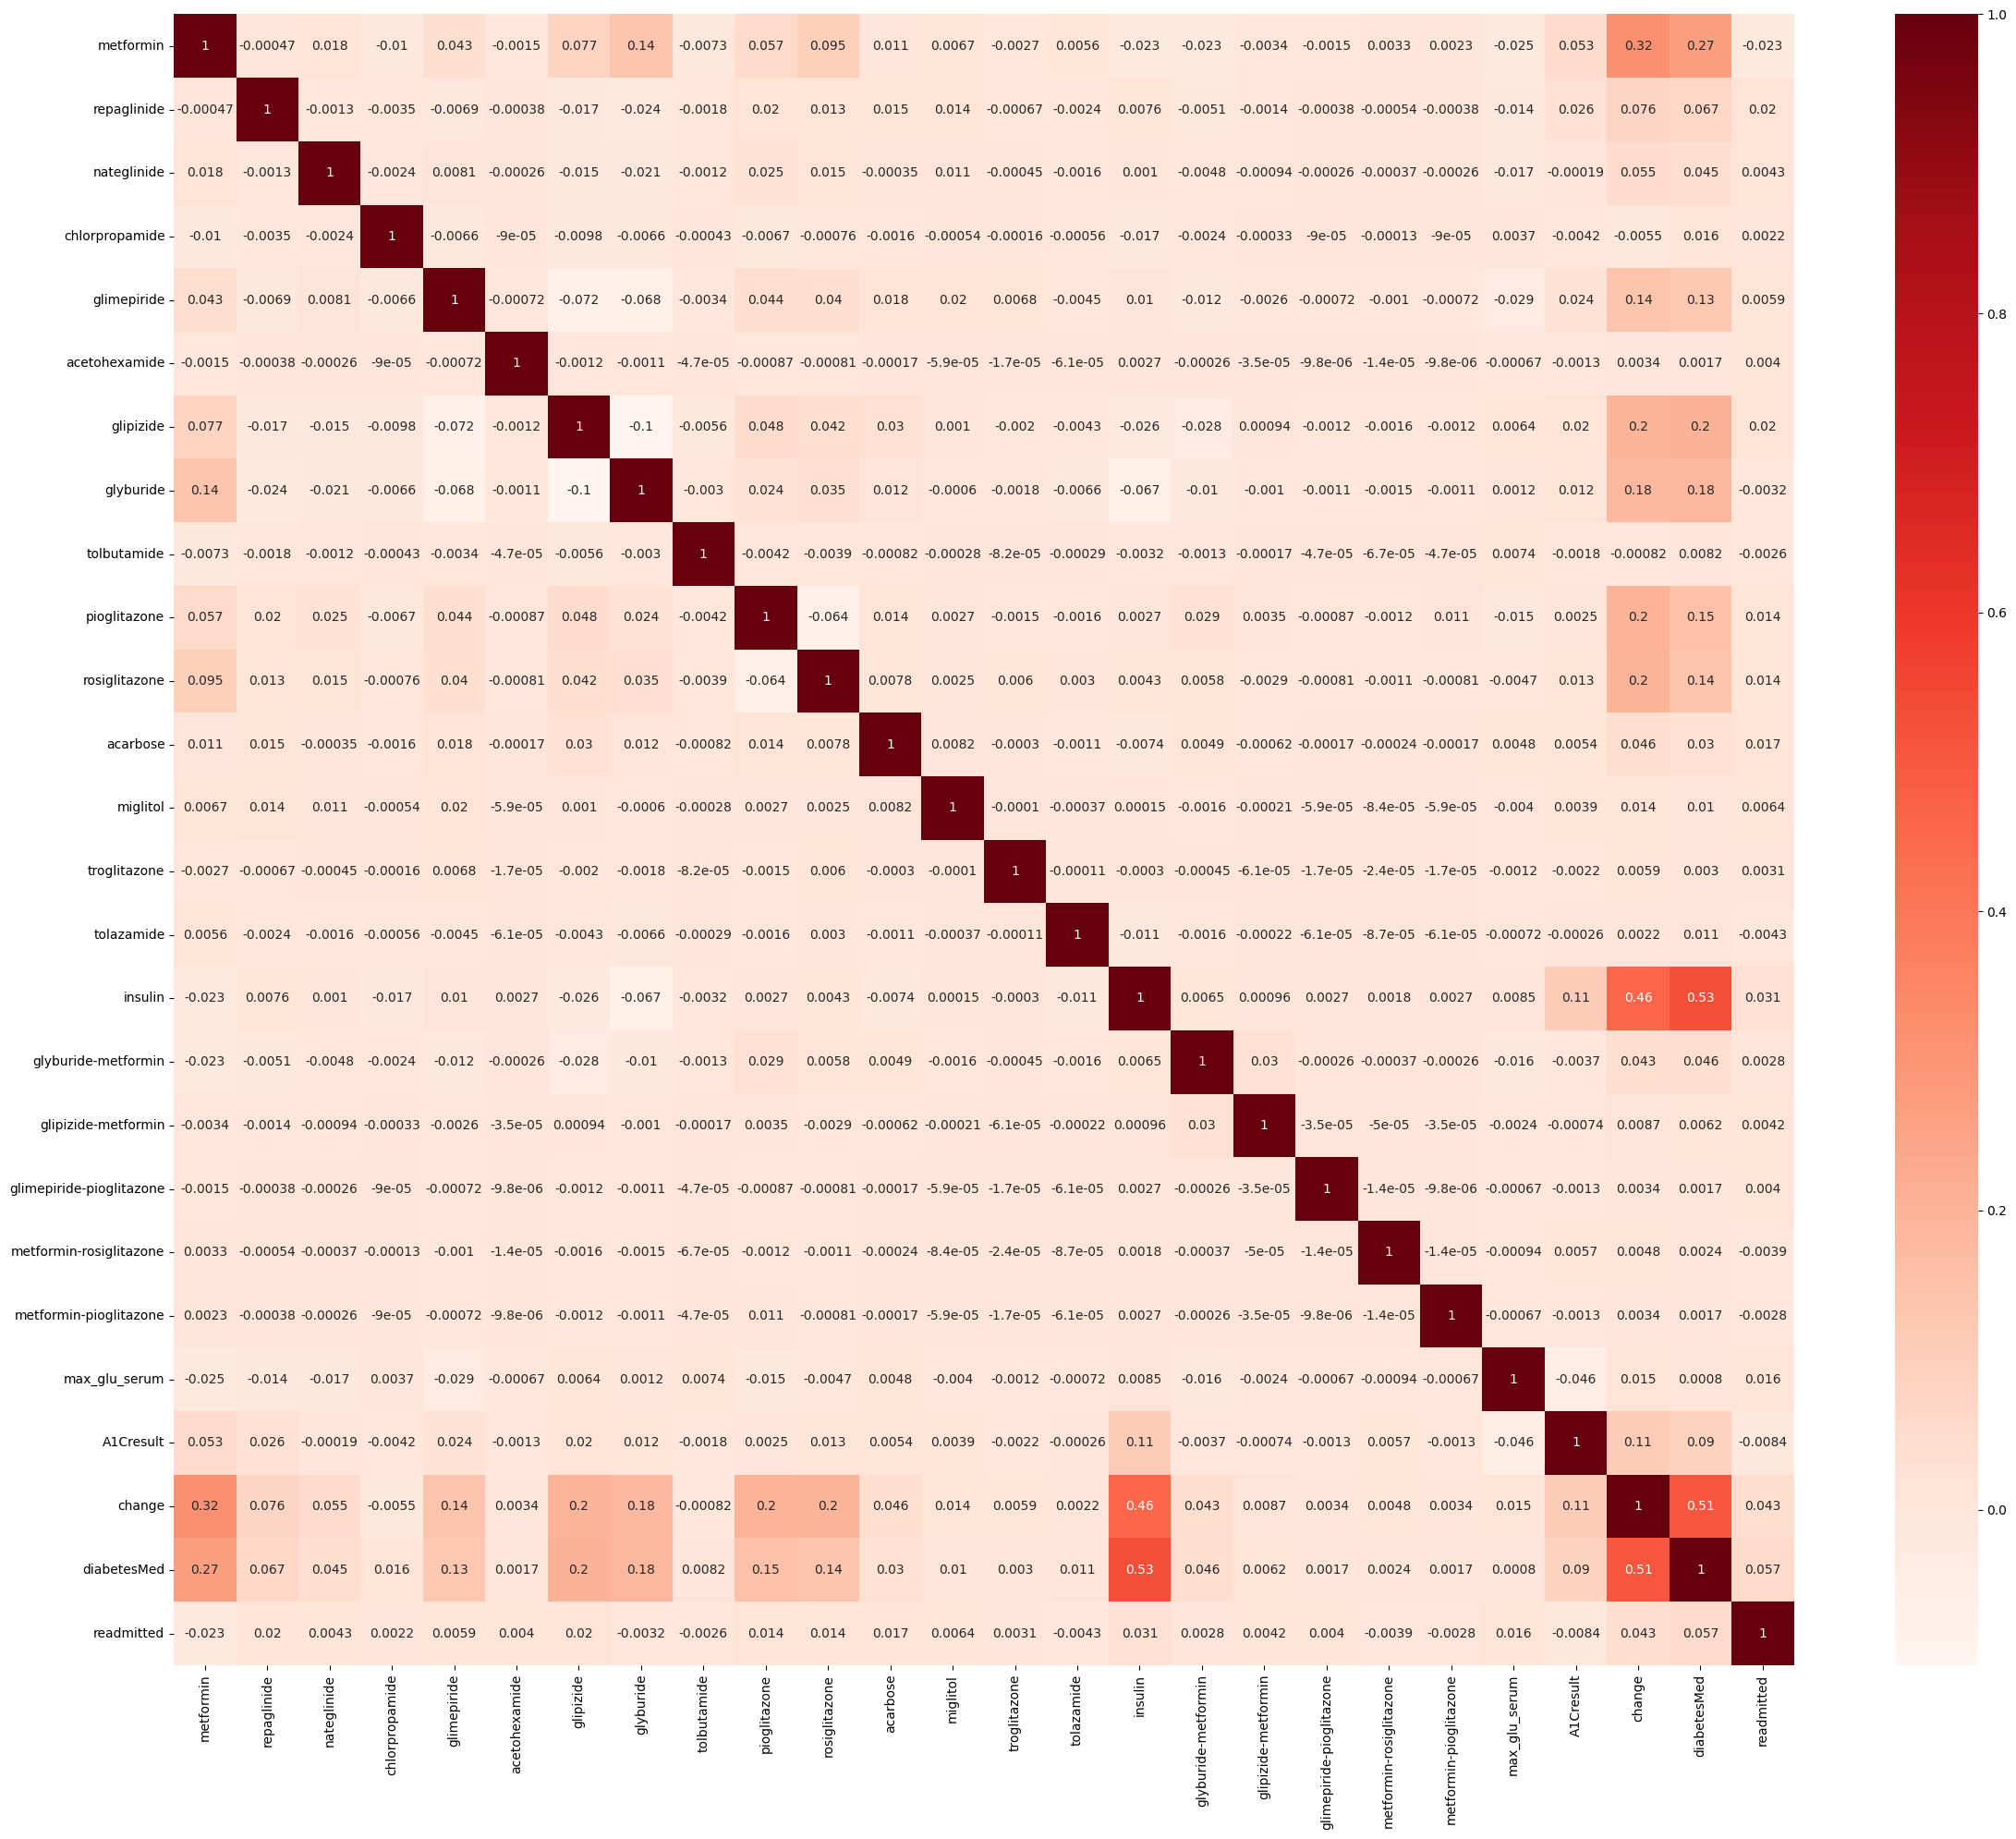

In [14]:
import pandas as pd
mat = pd.concat([X[X.columns[20:-3]], X["max_glu_serum"], X["A1Cresult"], X["change"], X["diabetesMed"], X["readmitted"]], axis=1)

cor = mat.corr()
plt.figure(figsize=(24,20))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

plt.tight_layout()
plt.show()

In [15]:
X.loc[:, "readmitted_binary"] = X["readmitted"].apply(lambda x: 0 if x == 0 else 1)

In [16]:
X.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary
0,Caucasian,Female,0,6,25,1,1,Pediatrics-Endocrinology,41,0,...,0,0,0,0,0,0,0,0,0,0
1,Caucasian,Female,10,1,1,7,3,missing,59,0,...,3,0,0,0,0,0,1,1,2,1
2,AfricanAmerican,Female,20,1,1,7,2,missing,11,5,...,0,0,0,0,0,0,0,1,0,0
3,Caucasian,Male,30,1,1,7,2,missing,44,1,...,3,0,0,0,0,0,1,1,0,0
4,Caucasian,Male,40,1,1,7,1,missing,51,0,...,2,0,0,0,0,0,1,1,0,0


In [17]:
# label encode the categorical variables
from sklearn.preprocessing import LabelEncoder

race_encoder = LabelEncoder()
gender_encoder = LabelEncoder()
medical_specialty_encoder = LabelEncoder()

X["race"] = race_encoder.fit_transform(X["race"])
X["gender"] = gender_encoder.fit_transform(X["gender"])
medical_specialty_encoder.fit(["missing"])
X["medical_specialty"] = medical_specialty_encoder.fit_transform(X["medical_specialty"])

In [18]:
diag_1_encoder = LabelEncoder()
diag_2_encoder = LabelEncoder()
diag_3_encoder = LabelEncoder()

X["diag_1"] = diag_1_encoder.fit_transform(X["diag_1"])
X["diag_2"] = diag_2_encoder.fit_transform(X["diag_2"])
X["diag_3"] = diag_3_encoder.fit_transform(X["diag_3"])

X = X.astype(int)

In [19]:
X.shape

(101742, 45)

In [20]:
X.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmitted_binary'],
      dtype='object')

<h3 align='center'>Hypothesis Testing</h3>

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf

sampled_data = X.sample(n=5000, random_state=42, replace=False)

1. T-test for mean difference in time_in_hospital based on readmission status

Null Hypothesis (H_0): The mean time spent in the hospital is equal for patients who were readmitted and those who were not readmitted.

Purpose: This test checks if readmitted patients tend to stay longer in the hospital, potentially indicating more severe cases or insufficient treatment during initial visits.

In [22]:
readmitted_sample = sampled_data[sampled_data['readmitted_binary'] == 1]['time_in_hospital']
not_readmitted_sample = sampled_data[sampled_data['readmitted_binary'] == 0]['time_in_hospital']

# Conduct a t-test
t_stat, p_value = ttest_ind(readmitted_sample, not_readmitted_sample, equal_var=False)
print(f"T-test for Time in Hospital and Readmission (Sample): t-statistic = {t_stat}, p-value = {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

T-test for Time in Hospital and Readmission (Sample): t-statistic = 3.1552961022226267, p-value = 0.0016131313724623009
Reject the null hypothesis.


The t-test result indicates a statistically significant difference in the average time spent in the hospital between readmitted and non-readmitted patients, suggesting that readmitted patients tend to have longer hospital stays, potentially reflecting more complex health issues.

-----------------------------------------------------------------------

2. Chi-Square test of independence to determine if age distribution varies across different readmission categories 

Null Hypothesis (H_0): Age distribution is independent of readmission status, meaning the age distribution is similar across different readmission categories.

Purpose: This test examines whether the age distribution differs across different readmission categories, helping to determine if certain age groups have distinct readmission patterns.

In [23]:
age_readmitted0_sample = sampled_data[sampled_data['readmitted'] == 0]['age']
age_readmitted1_sample = sampled_data[sampled_data['readmitted'] == 1]['age']
age_readmitted2_sample = sampled_data[sampled_data['readmitted'] == 2]['age']

age_bins = sorted(sampled_data['age'].unique())

age_readmitted0_counts_sample = age_readmitted0_sample.value_counts().reindex(age_bins, fill_value=0)
age_readmitted1_counts_sample = age_readmitted1_sample.value_counts().reindex(age_bins, fill_value=0)
age_readmitted2_counts_sample = age_readmitted2_sample.value_counts().reindex(age_bins, fill_value=0)

observed_counts_sample = pd.DataFrame({
    'Readmitted_0': age_readmitted0_counts_sample,
    'Readmitted_1': age_readmitted1_counts_sample,
    'Readmitted_2': age_readmitted2_counts_sample
}).T

chi2, p_value, dof, expected = chi2_contingency(observed_counts_sample)
print(f"Chi-Squared Test for Age Distribution (Sample): chi2 = {chi2}, p-value = {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Age distributions differ significantly across readmission categories.")
else:
    print("Fail to reject the null hypothesis: Age distributions are similar across readmission categories.")


Chi-Squared Test for Age Distribution (Sample): chi2 = 34.29797554504872, p-value = 0.011569497285707747
Reject the null hypothesis: Age distributions differ significantly across readmission categories.


The Chi-Square test result indicates a statistically significant difference in age distribution across different readmission categories, suggesting that certain age groups may exhibit unique patterns of readmission.

------------------------------------------------------------------ 

3. Chi-Square Test for Independence between A1C Result and Readmission

Null Hypothesis (H_0): A1C results (whether normal, >7, >8, etc.) are independent of the readmission status.

Purpose: This test examines if elevated A1C levels (indicative of poor blood sugar control) are associated with a higher likelihood of readmission, helping assess if A1C control impacts readmission risk.

In [24]:
contingency_table_sample = pd.crosstab(sampled_data['A1Cresult'], sampled_data['readmitted'])
chi2, p, dof, expected = chi2_contingency(contingency_table_sample)
print(f"Chi-square Test for A1C Result and Readmission (Sample): chi2 = {chi2}, p-value = {p}")

if p < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Chi-square Test for A1C Result and Readmission (Sample): chi2 = 8.731934191913215, p-value = 0.18922460662230067
Fail to reject the null hypothesis.


The Chi-Square test results indicate no statistically significant association between A1C results and readmission status, suggesting that elevated A1C levels may not have a direct impact on the likelihood of readmission.

-----------------------------------------------------------------------

4. Chi-Square Test for Independence between Insulin Use and Readmission

Null Hypothesis (H_0): The use of insulin is independent of the readmission status.

Purpose: This test checks if insulin-dependent patients are at a higher risk of readmission, which could indicate that those on insulin may have more severe diabetes requiring closer monitoring.

In [25]:
contingency_table_insulin_sample = pd.crosstab(sampled_data['insulin'], sampled_data['readmitted_binary'])
chi2_insulin, p_insulin, dof, expected = chi2_contingency(contingency_table_insulin_sample)
print(f"Chi-square Test for Insulin and Readmission (Sample): chi2 = {chi2_insulin}, p-value = {p_insulin}")

if p_insulin < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Chi-square Test for Insulin and Readmission (Sample): chi2 = 39.149837046219815, p-value = 1.6133264910944572e-08
Reject the null hypothesis.


The Chi-Square test result indicates a statistically significant association between insulin usage and readmission status, suggesting that patients on insulin may be at a higher risk of readmission, possibly due to more severe diabetes requiring closer monitoring.

-----------------------------------------------------------------------------------

A logistic regression model using age and race as predictors to estimate the likelihood of hospital readmission and prints the model summary along with the pseudo R-squared value.

In [26]:
# Logistic regression model with age and race
logit_model = smf.logit('readmitted_binary ~ age + race', data=X).fit()
print(logit_model.summary())

# print r squared
print(f"R-squared: {logit_model.prsquared}")

Optimization terminated successfully.
         Current function value: 0.689431
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      readmitted_binary   No. Observations:               101742
Model:                          Logit   Df Residuals:                   101739
Method:                           MLE   Df Model:                            2
Date:                Fri, 13 Dec 2024   Pseudo R-squ.:               0.0009505
Time:                        17:58:54   Log-Likelihood:                -70144.
converged:                       True   LL-Null:                       -70211.
Covariance Type:            nonrobust   LLR p-value:                 1.038e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3356      0.026    -12.675      0.000      -0.387      -0.284
age            0.0041      0.

This logistic regression model assesses the influence of age and race on the likelihood of readmission. The results show that younger age groups (10-20 to 90-100) have higher odds of readmission compared to the reference group, and race has varying effects, with races like Asian and Hispanic showing significantly lower odds of readmission. However, the low pseudo R-squared value (0.0036) suggests that age and race alone explain only a small portion of the variation in readmission rates.

PART 2 of the Project

In [27]:
X.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary
0,2,0,0,6,25,1,1,37,41,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,10,1,1,7,3,72,59,0,...,3,0,0,0,0,0,1,1,2,1
2,0,0,20,1,1,7,2,72,11,5,...,0,0,0,0,0,0,0,1,0,0
3,2,1,30,1,1,7,2,72,44,1,...,3,0,0,0,0,0,1,1,0,0
4,2,1,40,1,1,7,1,72,51,0,...,2,0,0,0,0,0,1,1,0,0


In [28]:
# classify the data using random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# make y from readmitted_binary and readmitted
y = X[['readmitted', 'readmitted_binary']]
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=["readmitted", "readmitted_binary"]), y, test_size=0.2, random_state=42)

In [ ]:
clf_binary = RandomForestClassifier(random_state=42)
clf_binary.fit(X_train, y_train['readmitted_binary'])
y_pred_binary = clf_binary.predict(X_test)
accuracy_binary = accuracy_score(y_test['readmitted_binary'], y_pred_binary)
print(f"Accuracy of Random Forest Classifier for Binary Readmission Prediction: {accuracy_binary}")

Accuracy of Random Forest Classifier for Binary Readmission Prediction: 0.6408177306010123


              precision    recall  f1-score   support

           0       0.64      0.75      0.69     10988
           1       0.63      0.52      0.57      9361

    accuracy                           0.64     20349
   macro avg       0.64      0.63      0.63     20349
weighted avg       0.64      0.64      0.64     20349

[[8194 2794]
 [4515 4846]]


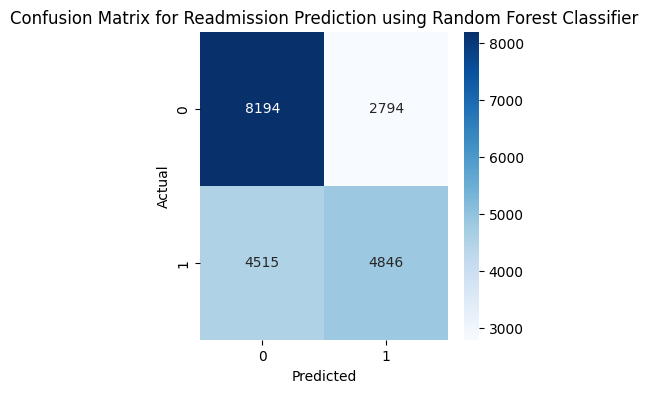

In [46]:
# make confusion matrix and classification report
from sklearn.metrics import classification_report
print(classification_report(y_test['readmitted_binary'], y_pred_binary))

# confusion matrix
confusion_matrix_binary = confusion_matrix(y_test['readmitted_binary'], y_pred_binary)
print(confusion_matrix_binary)

# plot confusion matrix
import seaborn as sns
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix_binary, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Readmission Prediction using Random Forest Classifier')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=42, max_iter=10000)
logistic_model.fit(X_train, y_train['readmitted_binary'])
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test['readmitted_binary'], y_pred_logistic)
print(f"Accuracy of Logistic Regression for Binary Readmission Prediction: {accuracy_logistic}")

Accuracy of Logistic Regression for Binary Readmission Prediction: 0.623077301095877


              precision    recall  f1-score   support

           0       0.61      0.81      0.70     10988
           1       0.65      0.40      0.49      9361

    accuracy                           0.62     20349
   macro avg       0.63      0.61      0.60     20349
weighted avg       0.63      0.62      0.61     20349

[[8927 2061]
 [5609 3752]]


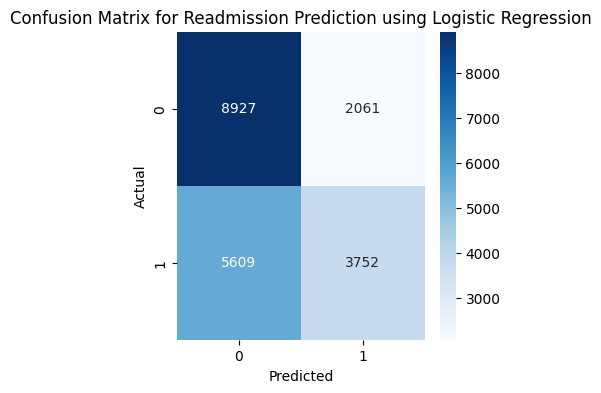

In [47]:
# make confusion matrix and classification report
from sklearn.metrics import classification_report
print(classification_report(y_test['readmitted_binary'], y_pred_logistic))

# confusion matrix
confusion_matrix_binary = confusion_matrix(y_test['readmitted_binary'], y_pred_logistic)
print(confusion_matrix_binary)

# plot confusion matrix
import seaborn as sns
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix_binary, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Readmission Prediction using Logistic Regression')
plt.show()


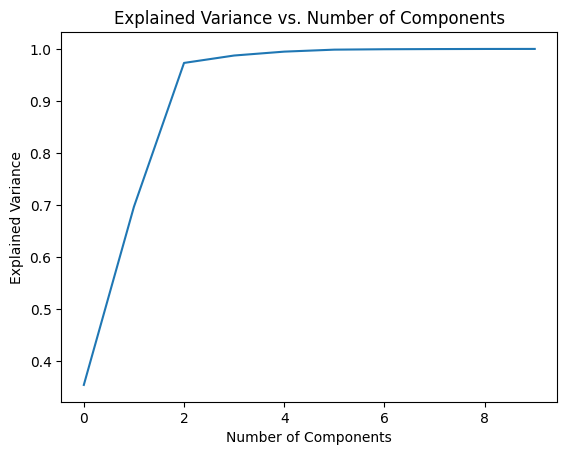

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=10, random_state=42)
svd.fit(X_train)

plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

Accuracy of Random Forest Classifier for Readmission Prediction after Applying SVD: 0.579438793061084
              precision    recall  f1-score   support

           0       0.60      0.68      0.63     10988
           1       0.55      0.47      0.51      9361

    accuracy                           0.58     20349
   macro avg       0.57      0.57      0.57     20349
weighted avg       0.58      0.58      0.57     20349



Text(0.5, 1.0, 'Confusion Matrix for Readmission Prediction using Random Forest Classifier after Applying SVD')

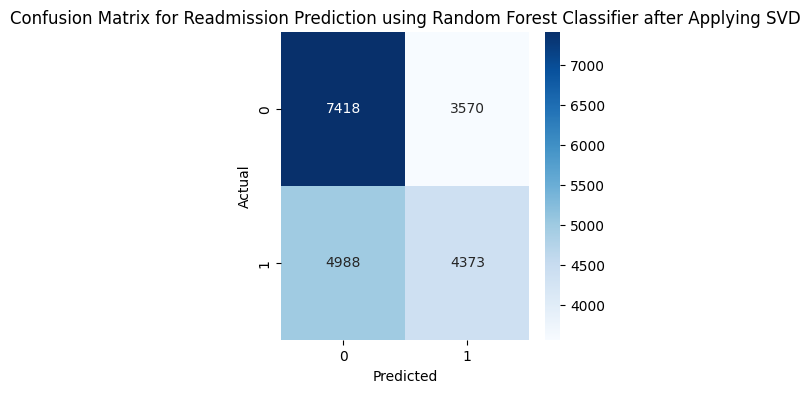

In [36]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=10)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

clf_binary = RandomForestClassifier(random_state=42)
clf_binary.fit(X_train_svd, y_train['readmitted_binary'])
y_pred_binary = clf_binary.predict(X_test_svd)
accuracy_binary = accuracy_score(y_test['readmitted_binary'], y_pred_binary)
print(f"Accuracy of Random Forest Classifier for Readmission Prediction after Applying SVD: {accuracy_binary}")

from sklearn.metrics import classification_report
print(classification_report(y_test['readmitted_binary'], y_pred_binary))

import seaborn as sns
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test['readmitted_binary'], y_pred_binary), annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Readmission Prediction using Random Forest Classifier after Applying SVD')


In [78]:
print(f"Sparsity of the dataset: {100 * (1 - np.count_nonzero(X) / X.size)}%")

Sparsity of the dataset: 60.04776788346995%


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69     10988
           1       0.63      0.52      0.57      9361

    accuracy                           0.64     20349
   macro avg       0.64      0.63      0.63     20349
weighted avg       0.64      0.64      0.64     20349



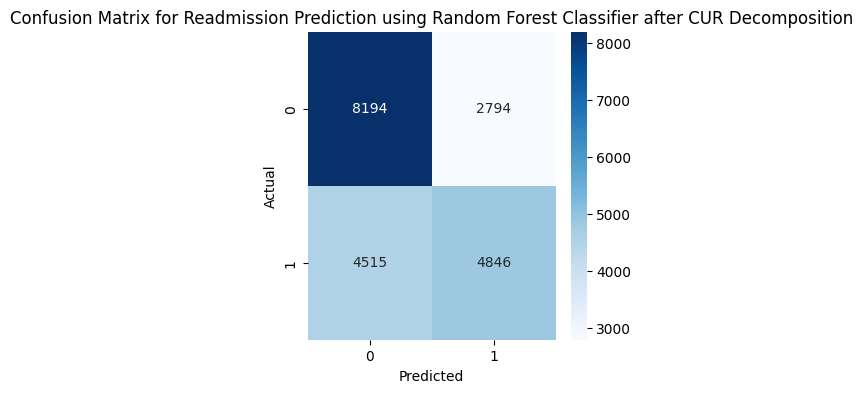

In [37]:
import numpy as np

r = 10

column_norms = np.linalg.norm(X_train, axis=0)
column_probs = column_norms / np.sum(column_norms)

# Sample columns for C
C_cols = np.random.choice(X_train.columns, size=r, replace=False, p=column_probs)
C = X_train[C_cols].to_numpy() / np.sqrt(r * column_probs[list(map(list(X_train.columns).index, C_cols))])

# Compute row norms and sampling probabilities
row_norms = np.linalg.norm(X_train, axis=1)
row_probs = row_norms / np.sum(row_norms)

# Sample rows for R
R_rows = np.random.choice(X_train.index, size=r, replace=False, p=row_probs)
R_scale_factors = np.sqrt(r * row_probs[list(map(list(X_train.index).index, R_rows))])
R = X_train.loc[R_rows].to_numpy() / R_scale_factors[:, np.newaxis]

# Extract intersection matrix W
W = X_train.loc[R_rows, C_cols].to_numpy()

# Compute U using SVD
U_w, sigma_w, VT_w = np.linalg.svd(W, full_matrices=False)
sigma_pinv = np.diag(1 / sigma_w)
U = U_w @ sigma_pinv @ VT_w

# Perform CUR decomposition
# C, U, R = cur_decomposition(X_train, r)
X_reduced = C @ U  # Reduced feature matrix

# Train a machine learning model (Random Forest in this case)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train["readmitted_binary"])

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test["readmitted_binary"], y_pred))

# plot confusion matrix
import seaborn as sns
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test['readmitted_binary'], y_pred), annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Readmission Prediction using Random Forest Classifier after CUR Decomposition')
plt.show()

In [33]:
from sklearn.feature_selection import mutual_info_classif

sample = X.sample(n=10000, random_state=42, replace=False)
X_sample = sample.drop(columns=["readmitted", "readmitted_binary"])
y_sample = sample["readmitted_binary"]

mi_scores_sample = mutual_info_classif(X_sample, y_sample, random_state=42)
top_features_sample = mi_scores_sample.argsort()[-10:]

In [34]:
cols = X_train.columns
X_train[cols[top_features_sample]]

,A1Cresult,diag_3,number_diagnoses,number_emergency,num_procedures,diag_1,discharge_disposition_id,number_outpatient,diag_2,number_inpatient
30872,0,547,4,0,3,693,1,0,241,0
33861,3,139,4,0,0,409,1,0,80,0
13682,0,86,6,0,1,275,1,2,249,0
2299,0,253,9,0,0,263,1,3,261,2
8904,0,536,7,0,0,282,5,0,192,0
...,...,...,...,...,...,...,...,...,...,...
6270,3,490,4,0,1,502,5,0,79,0
54898,0,139,7,0,0,329,1,0,110,0
76840,0,407,9,0,1,87,3,0,144,0
861,0,86,6,0,5,263,25,0,249,0


C:\Users\Manan\AppData\Roaming\Python\Python310\site-packages\sklearn\random_projection.py:408: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (10 < 16).The dimensionality of the problem will not be reduced.
  warnings.warn(


Accuracy of Logistic Regression for Binary Readmission Prediction with JL Lemma: 0.6190476190476191
              precision    recall  f1-score   support

           0       0.61      0.82      0.70     10988
           1       0.65      0.38      0.48      9361

    accuracy                           0.62     20349
   macro avg       0.63      0.60      0.59     20349
weighted avg       0.63      0.62      0.60     20349



[]

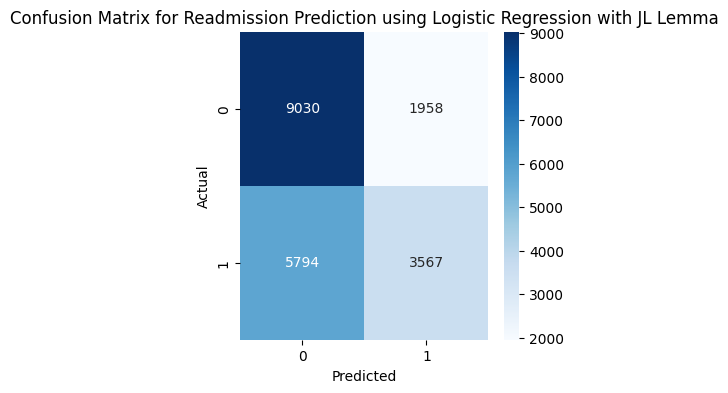

In [35]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.linear_model import LogisticRegression

X_train_top_features = X_train[cols[top_features_sample]]
X_test_top_features = X_test[cols[top_features_sample]]
# Apply JL Lemma using Gaussian Random Projection to reduce the number of rows
n_components = int(np.log2(X_train_top_features.shape[0]))  # log2(n)
jl_transformer = GaussianRandomProjection(n_components=n_components, random_state=42)
X_train_jl = jl_transformer.fit_transform(X_train_top_features)
X_test_jl = jl_transformer.transform(X_test_top_features)

# Train and evaluate the Logistic Regression model with JL transformed data
logistic_model_jl = LogisticRegression(random_state=42, max_iter=10000)
logistic_model_jl.fit(X_train_jl, y_train['readmitted_binary'])
y_pred_jl = logistic_model_jl.predict(X_test_jl)
accuracy_jl = accuracy_score(y_test['readmitted_binary'], y_pred_jl)
print(f"Accuracy of Logistic Regression for Binary Readmission Prediction with JL Lemma: {accuracy_jl}")

# make confusion matrix and classification report
from sklearn.metrics import classification_report
print(classification_report(y_test['readmitted_binary'], y_pred_jl))

# plot confusion matrix
import seaborn as sns
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test['readmitted_binary'], y_pred_jl), annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Readmission Prediction using Logistic Regression with JL Lemma')
plt.plot()


In [66]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X_train, y_train["readmitted_binary"], random_state=42)
top_features = mi_scores.argsort()[-10:]

In [32]:
# top_features = np.array([42,  5,  7, 15, 16, 17,  0,  4, 14, 13])
cols = X_train.columns
X_train[cols[top_features]]

,diabetesMed,admission_source_id,medical_specialty,diag_2,diag_3,number_diagnoses,race,discharge_disposition_id,diag_1,number_inpatient
30872,0,1,19,241,547,4,0,1,693,0
33861,1,6,18,80,139,4,0,1,409,0
13682,1,17,3,249,86,6,2,1,275,0
2299,1,7,72,261,253,9,0,1,263,2
8904,1,7,18,192,536,7,0,5,282,0
...,...,...,...,...,...,...,...,...,...,...
6270,1,1,28,79,490,4,2,5,502,0
54898,1,7,72,110,139,7,2,1,329,0
76840,0,1,72,144,407,9,2,3,87,0
861,1,1,3,249,86,6,2,25,263,0


In [75]:
# Find effect of race on diagnosis, find the top 3 most frequent diagnoses grouped by race
top_1_diag_by_race = X.groupby('race')['diag_1'].value_counts().groupby(level=0).nlargest(1).reset_index(level=0, drop=True)

# Inverse transform the race column
top_1_diag_by_race.index = race_encoder.inverse_transform(top_1_diag_by_race.index.get_level_values(0))

print(top_1_diag_by_race)


AfricanAmerican    1440
Asian                41
Caucasian          5343
Hispanic            150
Other               286
Name: count, dtype: int64


In [74]:
# Sort by max number of diagnoses and get the top 3 medical specialties
top_3_medical_specialties = X.groupby('medical_specialty')['number_diagnoses'].sum().sort_values(ascending=False).head(3)
print("Top 3 medical specialties with the highest number of diagnoses:")
print(medical_specialty_encoder.inverse_transform(top_3_medical_specialties.index))

Top 3 medical specialties with the highest number of diagnoses:
['missing' 'InternalMedicine' 'Emergency/Trauma']


C:\Users\Manan\AppData\Roaming\Python\Python310\site-packages\sklearn\random_projection.py:408: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (10 < 16).The dimensionality of the problem will not be reduced.
  warnings.warn(


Accuracy of Logistic Regression for Binary Readmission Prediction with JL Lemma: 0.6166887807754681
              precision    recall  f1-score   support

           0       0.61      0.83      0.70     10988
           1       0.65      0.36      0.47      9361

    accuracy                           0.62     20349
   macro avg       0.63      0.60      0.58     20349
weighted avg       0.63      0.62      0.59     20349



[]

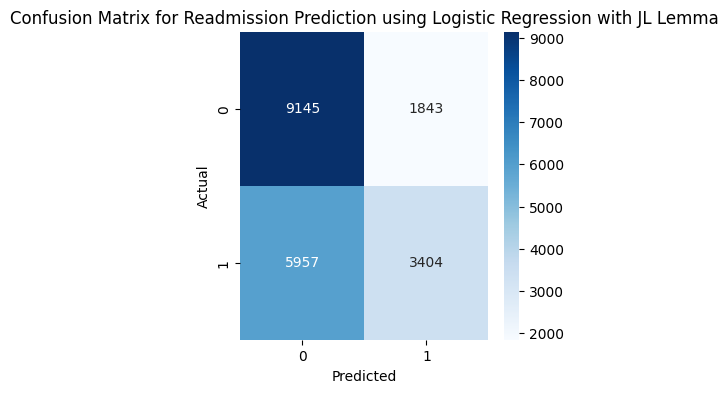

In [77]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.linear_model import LogisticRegression

X_train_top_features = X_train[cols[top_features]]
X_test_top_features = X_test[cols[top_features]]
# Apply JL Lemma using Gaussian Random Projection to reduce the number of rows
n_components = int(np.log2(X_train_top_features.shape[0]))  # log2(n)
jl_transformer = GaussianRandomProjection(n_components=n_components, random_state=42)
X_train_jl = jl_transformer.fit_transform(X_train_top_features)
X_test_jl = jl_transformer.transform(X_test_top_features)

# Train and evaluate the Logistic Regression model with JL transformed data
logistic_model_jl = LogisticRegression(random_state=42, max_iter=10000)
logistic_model_jl.fit(X_train_jl, y_train['readmitted_binary'])
y_pred_jl = logistic_model_jl.predict(X_test_jl)
accuracy_jl = accuracy_score(y_test['readmitted_binary'], y_pred_jl)
print(f"Accuracy of Logistic Regression for Binary Readmission Prediction with JL Lemma: {accuracy_jl}")

# make confusion matrix and classification report
from sklearn.metrics import classification_report
print(classification_report(y_test['readmitted_binary'], y_pred_jl))

# plot confusion matrix
import seaborn as sns
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test['readmitted_binary'], y_pred_jl), annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Readmission Prediction using Logistic Regression with JL Lemma')
plt.plot()
